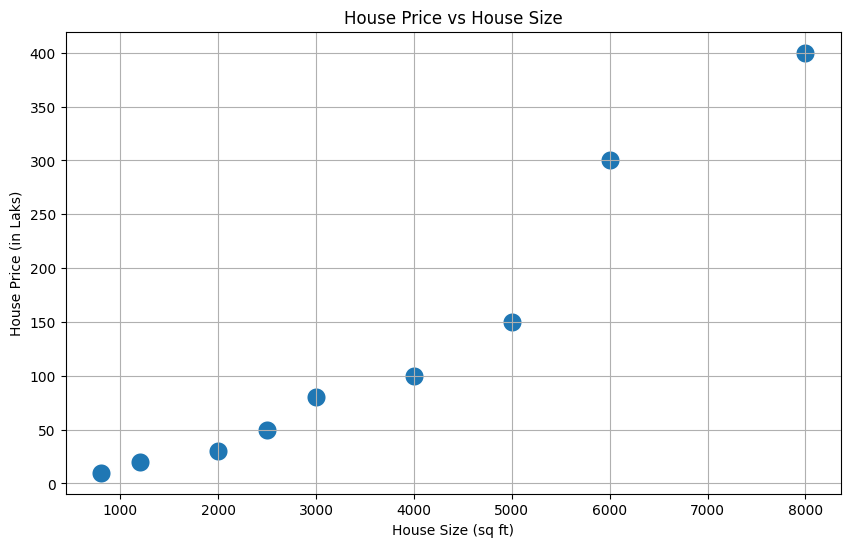

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame
data = {
    'HouseSize': [800, 1200, 2000, 2500, 3000, 4000, 5000, 6000, 8000],
    'HousePrice': [10, 20, 30, 50, 80, 100, 150, 300, 400]
}

df = pd.DataFrame(data)

# Plotting the line graph using the DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'HouseSize', y='HousePrice' , data = df,s=200)

# Adding titles and labels
plt.title('House Price vs House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in Laks)')
plt.grid(True)

# Show the plot
plt.show()


In [4]:
df

,HouseSize,HousePrice
0,800,10
1,1200,20
2,2000,30
3,2500,50
4,3000,80
5,4000,100
6,5000,150
7,6000,300
8,8000,400


In [5]:
df.to_csv("test.csv")

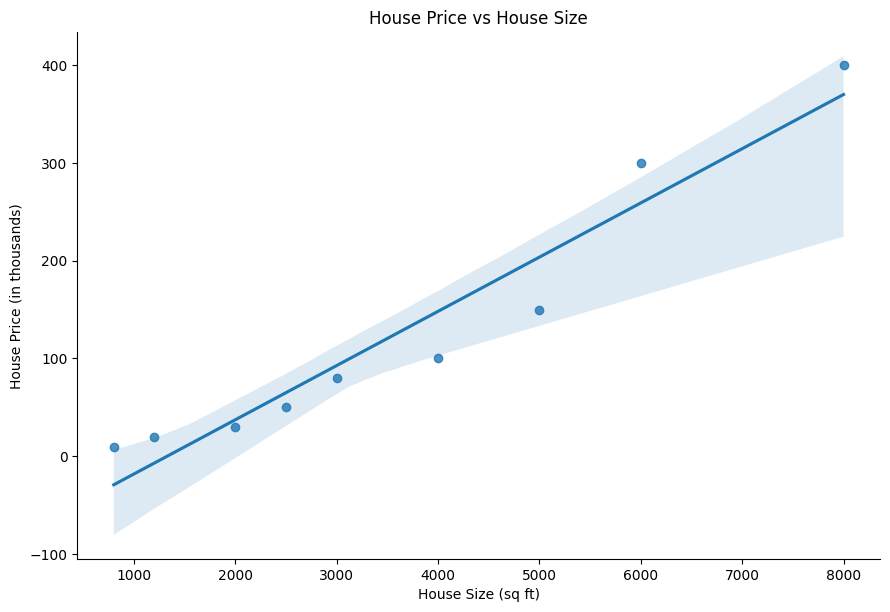

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame
data = {
    'HouseSize': [800, 1200, 2000, 2500, 3000, 4000, 5000, 6000, 8000],
    'HousePrice': [10, 20, 30, 50, 80, 100, 150, 300, 400]
}

df = pd.DataFrame(data)

# Plotting the lmplot
sns.lmplot(x='HouseSize', y='HousePrice', data=df, height=6, aspect=1.5)

# Adding titles and labels
plt.title('House Price vs House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in thousands)')

# Show the plot
plt.show()


1. Generate Synthetic Data
We'll generate HouseSize as random values between 500 and 10000 square feet, and HousePrice as a function of HouseSize with some added noise to simulate real-world variability.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Let's break down these imports from the `scikit-learn` library:

1. **`from sklearn.model_selection import train_test_split`**:
   - This function is used to split your dataset into two parts: a training set and a testing set. The training set is used to train your model, and the testing set is used to evaluate how well your model performs on unseen data.
   - By splitting your data, you can ensure that your model isn't just memorizing the data it's trained on but can generalize to new data.

2. **`from sklearn.linear_model import LinearRegression`**:
   - This imports the `LinearRegression` class, which is used to create a linear regression model. Linear regression is a simple algorithm that tries to find the best linear relationship (a straight line) between input features (like hours studied) and the output (like exam scores).
   - It's commonly used when you want to predict a continuous value (e.g., predicting a person's weight based on their height).

3. **`from sklearn.metrics import mean_squared_error`**:
   - This function is used to evaluate the performance of your regression model. It calculates the Mean Squared Error (MSE), which is the average of the squared differences between the predicted values and the actual values.
   - A lower MSE indicates that your model's predictions are closer to the actual values, meaning it is performing well.



In [8]:


# Set random seed for reproducibility
np.random.seed(42)

# Generate random HouseSize values between 500 and 10000 sq ft
house_size = np.random.randint(500, 10000, size=100)

# Generate HousePrice as a function of HouseSize with some added noise
house_price = 50 + 0.05 * house_size + np.random.normal(0, 10, size=100)

# Create a DataFrame
df = pd.DataFrame({'HouseSize': house_size, 'HousePrice': house_price})


In [9]:
df.to_csv("house.csv", index=False)

2. Prepare the Data


In [10]:
# Defining the input (X) and output (y) variables
X = df[['HouseSize']]  # Input feature should be a 2D array
y = df['HousePrice']   # Output variable can be a 1D array


In [11]:
X

,HouseSize
0,7770
1,1360
2,5890
3,5691
4,6234
...,...
95,3599
96,6778
97,8892
98,3604


In [12]:
X.iloc[16], y[16]

(HouseSize    6920
 Name: 16, dtype: int64,
 422.33528220612124)

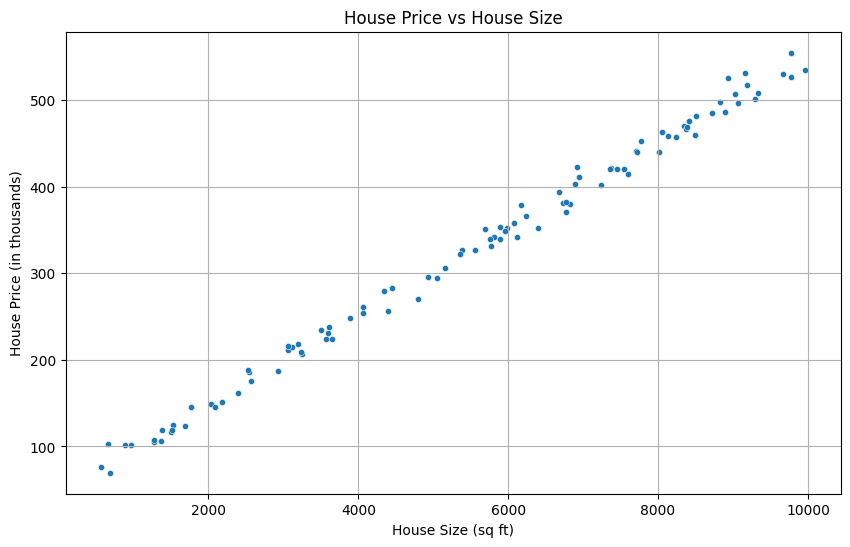

In [13]:

# Plotting the line graph using the DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'HouseSize', y='HousePrice' , data = df,s=20)

# Adding titles and labels
plt.title('House Price vs House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in thousands)')
plt.grid(True)

# Show the plot
plt.show()

3. Split the Data


In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4. Train the Model


In [15]:
# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

5. Make Predictions


In [16]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


6. Evaluate the Model


In [17]:
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculating the R-squared value
r_squared = model.score(X_test, y_test)
print(f'R-squared testing: {r_squared}')
# Calculating the R-squared value
r_squared_train = model.score(X_train, y_train)
print(f'R-squared training: {r_squared_train}')

Mean Squared Error: 73.26116531423818
R-squared testing: 0.9944876986220345
R-squared training: 0.9940694514382387


7. Visualize the Results


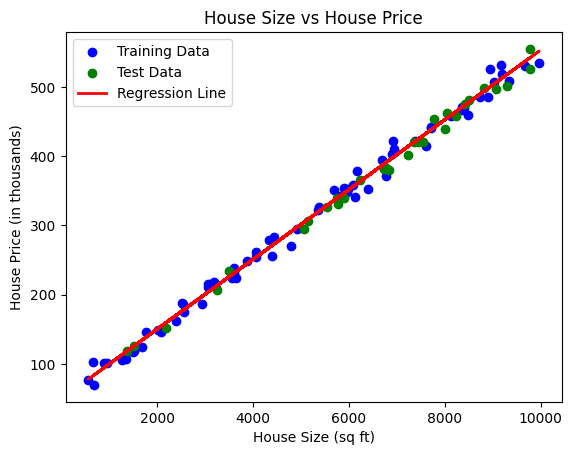

In [18]:
# Plotting the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plotting the test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Plotting the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in thousands)')
plt.title('House Size vs House Price')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


#Let compare the model output with actual outputs

In [19]:
# This is the actual value for first housesize in the test data
X_test.iloc[0].values, y_test[0]

(array([8506]), 453.1894128543239)

In [20]:
X_test.iloc[[0]] # get the first row

,HouseSize
83,8506


In [21]:
# Getting the original index of the first row in X_test
original_index = X_test.index[0]

# Accessing the original row from df
original_row = df.loc[original_index]

print(f'Original Row: \n{original_row}')


Original Row: 
HouseSize     8506.000000
HousePrice     481.470038
Name: 83, dtype: float64


In [22]:
# pass first row in the model predict method
model.predict(X_test.iloc[[0]])

array([478.12112862])

In [23]:
m = model.coef_ # this is the slope of the line

In [24]:
m

array([0.0504133])

In [25]:
# intercept
b = model.intercept_

In [26]:
houseprice = X_test.iloc[0] * m + b

In [27]:
houseprice

,83
HouseSize,478.121129


In [29]:
X_test.index[0]

83

In [30]:
X_test.iloc[[0]]

,HouseSize
83,8506
